In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as siuu
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,overall,verified,reviewerID,product,productID,reviewText,unixReviewTime
0,5,1,A30VYJQW4XWDQ6,"AGELESS™: UltraMAX Gold™ Capsules, HGH Anti-Ag...",B0011FYB5I,"Made me look older, it was the opposite.",1472692083
1,5,1,A30VYJQW4XWDQ6,"AGELESS™: UltraMAX Gold™ Capsules, HGH Anti-Ag...",B0011FYB5I,Works good with exercise.,1472690218
2,5,1,A28F08XFZRKIH5,All Natural Deodorant for Women & Men. Organic...,B01DKQAXC0,"great smell, and work better than the bad stuf...",1472692009
3,3,1,A157AUOFPJQ46Q,"American Crew Body Wash for Men, Tea Tree Leaf...",B000X7ST9Y,I don't understand the bad reviews because thi...,1472690166
4,5,1,A2USMIT2CSA08,"Andalou Naturals, Toner Facial Toner Helps Hyd...",B0091OCA86,Smells amazing and does a good job of refreshi...,1472691711


In [4]:
# from ydata_profiling import ProfileReport 

In [5]:
# profile = ProfileReport(df)

# profile.to_file(output_file='report.html')

## Text preprocessing

In [6]:
df.drop('product', axis=1, inplace=True)
df.drop('unixReviewTime', axis=1, inplace=True)
df

,overall,verified,reviewerID,productID,reviewText
0,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"Made me look older, it was the opposite."
1,5,1,A30VYJQW4XWDQ6,B0011FYB5I,Works good with exercise.
2,5,1,A28F08XFZRKIH5,B01DKQAXC0,"great smell, and work better than the bad stuf..."
3,3,1,A157AUOFPJQ46Q,B000X7ST9Y,I don't understand the bad reviews because thi...
4,5,1,A2USMIT2CSA08,B0091OCA86,Smells amazing and does a good job of refreshi...
...,...,...,...,...,...
4216,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...
4217,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...
4218,5,0,A281NPSIMI1C2R,B0006O10P4,"Warm, soothing and a little spicy. This zum ba..."
4219,5,1,A3E5V5TSTAY3R9,B0006O10P4,I decided to SPLURGE ($8.98 for a 3 oz. bar) a...


In [7]:
def remove_bullet_points(text):
    bullet_point_pattern = re.compile(r'\s*[\u2022\u2023\u25E6]\s*') 
    cleaned_text = bullet_point_pattern.sub(' ', text)

    return cleaned_text

In [8]:
def remove_emojis_and_symbols_from_text(text):
    # Define pattern to match emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002500-\U00002BEF"  # chinese char
                           u"\U00002702-\U000027B0"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"
                           u"\u00ae" # trade Marks ®
                           u"\u00A9" # copy Right ©
                           u"\u2122" # Trade Mark TM
                           u"\u200b"
                           "]+", flags=re.UNICODE)
    # Remove emojis from the text
    cleaned_text = emoji_pattern.sub(r' ', text)
    return cleaned_text

In [9]:
def decontraction(x):
    contractions = {
        "you've": 'you have',
        "you're": 'you are',
        "haven't": 'have not',
        "hasn't": 'has not',
        "hadn't've": 'had not have',
        "hadn't": 'had not',
        "don't": 'do not',
        "doesn't": 'does not',
        "didn't": 'did not',
        "couldn't've": 'could not have',
        "couldn't": 'could not',
        "could've": 'could have',
        "'cause": 'because',
        "can't've": 'cannot have',
        "aren't": 'are not',
        "ain't": 'am not',
        "can't": 'can not',
        "won't": 'will not',
        "he'd": 'he would',
        "he'd've": 'he would have',
        "he'll": 'he will',
        "he'll've": 'he will have',
        "he's": 'he is',
        "how'd": 'how did',
        "how'd'y": 'how do you',
        "how'll": 'how will',
        "how's": 'how does',
        "i'd": 'i would',
        "i'd've": 'i would have',
        "i'll": 'i will',
        "i'll've": 'i will have',
        "i'm": 'i am',
        "i've": 'i have',
        "isn't": 'is not',
        "it'd": 'it would',
        "it'd've": 'it would have',
        "it'll": 'it will',
        "it'll've": 'it will have',
        "it's": 'it is',
        "let's": 'let us',
        "ma'am": 'madam',
        "mayn't": 'may not',
        "might've": 'might have',
        "mightn't": 'might not',
        "mightn't've": 'might not have',
        "must've": 'must have',
        "mustn't": 'must not',
        "mustn't've": 'must not have',
        "needn't": 'need not',
        "needn't've": 'need not have',
        "o'clock": 'of the clock',
        "oughtn't": 'ought not',
        "oughtn't've": 'ought not have',
        "shan't": 'shall not',
        "sha'n't": 'shall not',
        "shan't've": 'shall not have',
        "she'd": 'she would',
        "she'd've": 'she would have',
        "she'll": 'she will',
        "she'll've": 'she will have',
        "she's": 'she is',
        "should've": 'should have',
        "shouldn't": 'should not',
        "shouldn't've": 'should not have',
        "so've": 'so have',
        "so's": 'so is',
        "that'd": 'that would',
        "that'd've": 'that would have',
        "that's": 'that is',
        "there'd": 'there would',
        "there'd've": 'there would have',
        "there's": 'there is',
        "they'd": 'they would',
        "they'd've": 'they would have',
        "they'll": 'they will',
        "they'll've": 'they will have',
        "they're": 'they are',
        "they've": 'they have',
        "to've": 'to have',
        "wasn't": 'was not',
        "we're": 'we are',
        "'s": " is",
        "n't": ' not',
        "'re": ' are',
        "'d": ' would',
        "'ll": ' will',
        "'t": ' not',
        "'ve": ' have',
        "'m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    contractions_comma = {
        "you’ve": 'you have',
        "you’re": 'you are',
        "haven’t": 'have not',
        "hasn’t": 'has not',
        "hadn’t've": 'had not have',
        "hadn’t": 'had not',
        "don’t": 'do not',
        "doesn’t": 'does not',
        "didn’t": 'did not',
        "couldn’t’ve": 'could not have',
        "couldn’t": 'could not',
        "could’ve": 'could have',
        "’cause": 'because',
        "can’t’ve": 'cannot have',
        "aren’t": 'are not',
        "ain’t": 'am not',
        "can’t": 'can not',
        "won’t": 'will not',
        "he’d": 'he would',
        "he'd've": 'he would have',
        "he’ll": 'he will',
        "he’ll’ve": 'he will have',
        "he’s": 'he is',
        "how’d": 'how did',
        "how’d'y": 'how do you',
        "how’ll": 'how will',
        "how’s": 'how does',
        "i’d": 'i would',
        "i’d’ve": 'i would have',
        "i’ll": 'i will',
        "i’ll’ve": 'i will have',
        "i’m": 'i am',
        "i’ve": 'i have',
        "isn’t": 'is not',
        "it’d": 'it would',
        "it’d’ve": 'it would have',
        "it’ll": 'it will',
        "it'll've": 'it will have',
        "it’s": 'it is',
        "let's": 'let us',
        "ma’am": 'madam',
        "mayn’t": 'may not',
        "might’ve": 'might have',
        "mightn’t": 'might not',
        "mightn’t've": 'might not have',
        "must’ve": 'must have',
        "mustn’t": 'must not',
        "mustn’t’ve": 'must not have',
        "needn’t": 'need not',
        "needn’t’ve": 'need not have',
        "o’clock": 'of the clock',
        "oughtn’t": 'ought not',
        "oughtn’t’ve": 'ought not have',
        "shan’t": 'shall not',
        "sha’n’t": 'shall not',
        "shan’t’ve": 'shall not have',
        "she’d": 'she would',
        "she’d’ve": 'she would have',
        "she’ll": 'she will',
        "she’ll’ve": 'she will have',
        "she’s": 'she is',
        "should’ve": 'should have',
        "shouldn’t": 'should not',
        "shouldn't've": 'should not have',
        "so’ve": 'so have',
        "so's": 'so is',
        "that’d": 'that would',
        "that’d've": 'that would have',
        "that’s": 'that is',
        "there’d": 'there would',
        "there’d’ve": 'there would have',
        "there’s": 'there is',
        "they’d": 'they would',
        "they’d've": 'they would have',
        "they’ll": 'they will',
        "they’ll've": 'they will have',
        "they’re": 'they are',
        "they’ve": 'they have',
        "to’ve": 'to have',
        "wasn’t": 'was not',
        "we’re": 'we are',
        "’s": " is",
        "n’t": ' not',
        "’re": ' are',
        "’d": ' would',
        "’ll": ' will',
        "’t": ' not',
        "’ve": ' have',
        "’m": ' am',
        ' u ': ' you ',
        ' ur ': ' your ',
        ' n ': ' and '
    }

    for key in contractions:
        value = contractions[key]
        x = x.replace(key, value)

    for key in contractions_comma:
        value = contractions_comma[key]
        x = x.replace(key, value)
    return x

In [10]:
def removepunc(x):
    punctuation = '!\xad\xa0\xe2\x80\x9d\xe2\x80\x99\xe2\x80\xa2()*+-/:;<=>[]^_`{|}~@#,.?$%&"”“’‘\'…<>«»'
    translation_table = str.maketrans(punctuation, ' ' * len(punctuation))
    return x.translate(translation_table)

In [11]:
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

In [12]:
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, ' ', text)

In [13]:
def remove_ampersand(text):
    text = text.replace('&amp;', '')
    text = text.replace('andamp;', '')
    return text

In [14]:
def remove_code_from_text(text):
    code_pattern = r'\b[0-9a-fA-F]{64}\b'  # Assuming the code is a 64-character hexadecimal string
    cleaned_text = re.sub(code_pattern, ' ', text)

    return cleaned_text

In [15]:
def remove_number_from_text(text):
    number_pattern = r'[0-9]'  # Assuming the code is a 64-character hexadecimal string
    cleaned_text = re.sub(number_pattern, ' ', text)

    return cleaned_text

In [16]:
def remove_currency_symbols(text):
    currency_pattern = re.compile(r'[$€¥₹£¢₽₩₪₴₱₨฿₦₮₲₭₵₿]')  # Matches any currency symbol
    cleaned_text = currency_pattern.sub(' ', text)

    return cleaned_text

In [17]:
def remove_hyphens(text):
    hyphen_pattern = re.compile(r'\b(\w+)[-—‑–](\w+)\b')  # Matches hyphens within words
    cleaned_text = hyphen_pattern.sub(r'\1 \2', text)

    return cleaned_text

In [18]:
def text_processing(text):

    # Lowercasing text
    text = text.lower()

    # Removing URLs from text
    text = re.sub(r"http\S+", "", text)

    # Removing newline character
    text = re.sub(r"\n", "", text)

    # Replacing & character with 'and'
    text = re.sub(r"&", "and", text)

    # Removing HTML tags
    text = remove_html_tags(text)

    # Removing ampersand from the text
    text = remove_ampersand(text)

    # Performing decontraction on the text
    text = decontraction(text)

    # Removing the punctuations from the text
    text = removepunc(text)

    # Removing 64-character hexadecimal string in the text
    text = remove_code_from_text(text)

    # Removing number in the text
    text = remove_number_from_text(text)

    # Removing emojis from text
    text = remove_emojis_and_symbols_from_text(text)

    # Remove •, ‣, and ◦ bullet points
    text = remove_bullet_points(text)

    # Remove hyphens from hyphenated word
    text = remove_hyphens(text)

    # Remove currency symbols from the text
    text = remove_currency_symbols(text)

    # Removing extra space in the text
    text = remove_extra_spaces(text)

    return text

In [19]:
df['clean_reviewText'] = df['reviewText'].map(str).apply(text_processing)
df['clean_reviewText']

0                 made me look older it was the opposite 
1                               works good with exercise 
2       great smell and work better than the bad stuff...
3       i do not understand the bad reviews because th...
4       smells amazing and does a good job of refreshi...
                              ...                        
4216    this is the best smelling soap i have ever fou...
4217    this is the best smelling soap i have ever fou...
4218    warm soothing and a little spicy this zum bar ...
4219    i decided to splurge for a oz bar and buy this...
4220    this is the best smelling soap i have ever fou...
Name: clean_reviewText, Length: 4221, dtype: object

#### Tokenization

Splitting the input text into individual words. The most basic and common method for word tokenization is to split the text on whitespace characters (spaces, tabs, newlines) to separate words

In [20]:
df['tokenized'] = df['clean_reviewText'].apply(lambda sentence:word_tokenize(sentence))

In [21]:
df['tokenized']

0         [made, me, look, older, it, was, the, opposite]
1                           [works, good, with, exercise]
2       [great, smell, and, work, better, than, the, b...
3       [i, do, not, understand, the, bad, reviews, be...
4       [smells, amazing, and, does, a, good, job, of,...
                              ...                        
4216    [this, is, the, best, smelling, soap, i, have,...
4217    [this, is, the, best, smelling, soap, i, have,...
4218    [warm, soothing, and, a, little, spicy, this, ...
4219    [i, decided, to, splurge, for, a, oz, bar, and...
4220    [this, is, the, best, smelling, soap, i, have,...
Name: tokenized, Length: 4221, dtype: object

#### Removing stopwords

Stopwords are commonly used words in a language that are considered to have little or no semantic meaning, e.g 'the', 'is', 'and', 'a', 'an'

Removing them reduce dimensionality without losing meaning -> overall W

In [22]:
nltk_stopwords = stopwords.words('english')
print("Total number of Stop words: ",len(nltk_stopwords))
print()
print(nltk_stopwords)

Total number of Stop words:  179

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'onl

In [23]:
def remove_stopwords(tokens):
    # Get the English stop words from NLTK
    stop_words = set(stopwords.words('english'))

    return [word for word in tokens if word.lower() not in stop_words]

# Removing stop words from the tokenized text column
df['stopwords_removed'] = df['tokenized'].apply(remove_stopwords)

df['stopwords_removed']

0                           [made, look, older, opposite]
1                                 [works, good, exercise]
2       [great, smell, work, better, bad, stuff, go, f...
3       [understand, bad, reviews, excellent, body, wa...
4       [smells, amazing, good, job, refreshing, provi...
                              ...                        
4216    [best, smelling, soap, ever, found, potently, ...
4217    [best, smelling, soap, ever, found, potently, ...
4218    [warm, soothing, little, spicy, zum, bar, soap...
4219    [decided, splurge, oz, bar, buy, wonderfully, ...
4220    [best, smelling, soap, ever, found, potently, ...
Name: stopwords_removed, Length: 4221, dtype: object

In [24]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Sample data: a list of documents
# documents = [
#     "The sky is blue.",
#     "The sun is bright today.",
#     "The sun in the sky is bright.",
#     "We can see the shining sun, the bright sun."
# ]

# # Initialize the TfidfVectorizer
# vectorizer = TfidfVectorizer()

# # Fit and transform the documents
# tfidf_matrix = vectorizer.fit_transform(documents)

# # Convert the TF-IDF matrix to a dense format (optional)
# tfidf_matrix_dense = tfidf_matrix.toarray()

# # Get the feature names (words)
# feature_names = vectorizer.get_feature_names_out()

# # Display the TF-IDF matrix
# print("TF-IDF Matrix (Dense Format):")
# print(tfidf_matrix_dense)

# print("\nFeature Names:")
# print(feature_names)

# # Create a DataFrame for better visualization (optional)
# import pandas as pd

# df = pd.DataFrame(tfidf_matrix_dense, columns=feature_names)
# print("\nTF-IDF DataFrame:")
# print(df)


#### Stemming

Reduce words to their base or root form, called a stem. The stem may not necessarily be a valid word itself, but it represents the core meaning of the word.

In [25]:
snow_stemmer = nltk.stem.SnowballStemmer('english')

df['stemmatized_text'] = df['stopwords_removed'].apply(lambda x: [snow_stemmer.stem(word) for word in x])
df

,overall,verified,reviewerID,productID,reviewText,clean_reviewText,tokenized,stopwords_removed,stemmatized_text
0,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"Made me look older, it was the opposite.",made me look older it was the opposite,"[made, me, look, older, it, was, the, opposite]","[made, look, older, opposite]","[made, look, older, opposit]"
1,5,1,A30VYJQW4XWDQ6,B0011FYB5I,Works good with exercise.,works good with exercise,"[works, good, with, exercise]","[works, good, exercise]","[work, good, exercis]"
2,5,1,A28F08XFZRKIH5,B01DKQAXC0,"great smell, and work better than the bad stuf...",great smell and work better than the bad stuff...,"[great, smell, and, work, better, than, the, b...","[great, smell, work, better, bad, stuff, go, f...","[great, smell, work, better, bad, stuff, go, f..."
3,3,1,A157AUOFPJQ46Q,B000X7ST9Y,I don't understand the bad reviews because thi...,i do not understand the bad reviews because th...,"[i, do, not, understand, the, bad, reviews, be...","[understand, bad, reviews, excellent, body, wa...","[understand, bad, review, excel, bodi, wash, s..."
4,5,1,A2USMIT2CSA08,B0091OCA86,Smells amazing and does a good job of refreshi...,smells amazing and does a good job of refreshi...,"[smells, amazing, and, does, a, good, job, of,...","[smells, amazing, good, job, refreshing, provi...","[smell, amaz, good, job, refresh, provid, mois..."
...,...,...,...,...,...,...,...,...,...
4216,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...,this is the best smelling soap i have ever fou...,"[this, is, the, best, smelling, soap, i, have,...","[best, smelling, soap, ever, found, potently, ...","[best, smell, soap, ever, found, potent, scent..."
4217,5,0,A3E5V5TSTAY3R9,B0006O10P4,This is the best smelling soap I've ever found...,this is the best smelling soap i have ever fou...,"[this, is, the, best, smelling, soap, i, have,...","[best, smelling, soap, ever, found, potently, ...","[best, smell, soap, ever, found, potent, scent..."
4218,5,0,A281NPSIMI1C2R,B0006O10P4,"Warm, soothing and a little spicy. This zum ba...",warm soothing and a little spicy this zum bar ...,"[warm, soothing, and, a, little, spicy, this, ...","[warm, soothing, little, spicy, zum, bar, soap...","[warm, sooth, littl, spici, zum, bar, soap, pe..."
4219,5,1,A3E5V5TSTAY3R9,B0006O10P4,I decided to SPLURGE ($8.98 for a 3 oz. bar) a...,i decided to splurge for a oz bar and buy this...,"[i, decided, to, splurge, for, a, oz, bar, and...","[decided, splurge, oz, bar, buy, wonderfully, ...","[decid, splurg, oz, bar, buy, wonder, strong, ..."


In [26]:
df = df.drop(['reviewText',
              'tokenized', 'clean_reviewText', 'stopwords_removed'], axis=1)

# Rename the column
df = df.rename(columns={'stemmatized_text': 'reviewText'})
df

,overall,verified,reviewerID,productID,reviewText
0,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"[made, look, older, opposit]"
1,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"[work, good, exercis]"
2,5,1,A28F08XFZRKIH5,B01DKQAXC0,"[great, smell, work, better, bad, stuff, go, f..."
3,3,1,A157AUOFPJQ46Q,B000X7ST9Y,"[understand, bad, review, excel, bodi, wash, s..."
4,5,1,A2USMIT2CSA08,B0091OCA86,"[smell, amaz, good, job, refresh, provid, mois..."
...,...,...,...,...,...
4216,5,0,A3E5V5TSTAY3R9,B0006O10P4,"[best, smell, soap, ever, found, potent, scent..."
4217,5,0,A3E5V5TSTAY3R9,B0006O10P4,"[best, smell, soap, ever, found, potent, scent..."
4218,5,0,A281NPSIMI1C2R,B0006O10P4,"[warm, sooth, littl, spici, zum, bar, soap, pe..."
4219,5,1,A3E5V5TSTAY3R9,B0006O10P4,"[decid, splurg, oz, bar, buy, wonder, strong, ..."


In [27]:
def join_words(tokens):
    sentence = ' '.join(tokens)
    return sentence

# joining the tokenized words to provide as input to the TfidfVectorizer
df['new_reviewText'] = df['reviewText'].apply(join_words)
df['new_reviewText']

0                                 made look older opposit
1                                       work good exercis
2              great smell work better bad stuff go figur
3       understand bad review excel bodi wash smell ni...
4       smell amaz good job refresh provid moistur fre...
                              ...                        
4216    best smell soap ever found potent scent put ba...
4217    best smell soap ever found potent scent put ba...
4218    warm sooth littl spici zum bar soap perfect fa...
4219    decid splurg oz bar buy wonder strong smell so...
4220    best smell soap ever found potent scent put ba...
Name: new_reviewText, Length: 4221, dtype: object

In [28]:
df.to_csv('data_processed.csv')

### see distribution

In [2]:
df = pd.read_csv('data_processed.csv')
df = df.dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4212 entries, 0 to 4220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4212 non-null   int64 
 1   overall         4212 non-null   int64 
 2   verified        4212 non-null   int64 
 3   reviewerID      4212 non-null   object
 4   productID       4212 non-null   object
 5   reviewText      4212 non-null   object
 6   new_reviewText  4212 non-null   object
dtypes: int64(3), object(4)
memory usage: 263.2+ KB


In [128]:
df0 = df[df['verified'] == 0 ]
df1 = df[df['verified'] == 1 ]

df1 = df1.sample(n = 800,random_state= 23463456)
df = pd.concat([df1,df0])

In [33]:
# len_word = []
# len_word_spam = []
# len_word_no_spam =[]
# for i  in df['reviewText']:
#     len_word.append(len(i))

# for i  in df[df['verified'] == 0]['reviewText']:
#     len_word_spam.append(len(i))

# for i  in df[df['verified'] == 1]['reviewText']:
#     len_word_no_spam.append(len(i))





In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.hist(len_word,bins = 50)
plt.title('distribution of len of words')

plt.subplot(1,3,2)
plt.hist(len_word_no_spam,bins = 50)
plt.title('distribution of len of words of normal comments')


plt.subplot(1,3,3)
plt.hist(len_word_spam,bins = 100)
plt.title('distribution of len of words of spam comments')

In [53]:
df

,Unnamed: 0,overall,verified,reviewerID,productID,reviewText,new_reviewText
0,0,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"['made', 'look', 'older', 'opposit']",made look older opposit
1,1,5,1,A30VYJQW4XWDQ6,B0011FYB5I,"['work', 'good', 'exercis']",work good exercis
2,2,5,1,A28F08XFZRKIH5,B01DKQAXC0,"['great', 'smell', 'work', 'better', 'bad', 's...",great smell work better bad stuff go figur
3,3,3,1,A157AUOFPJQ46Q,B000X7ST9Y,"['understand', 'bad', 'review', 'excel', 'bodi...",understand bad review excel bodi wash smell ni...
4,4,5,1,A2USMIT2CSA08,B0091OCA86,"['smell', 'amaz', 'good', 'job', 'refresh', 'p...",smell amaz good job refresh provid moistur fre...
...,...,...,...,...,...,...,...
4216,4216,5,0,A3E5V5TSTAY3R9,B0006O10P4,"['best', 'smell', 'soap', 'ever', 'found', 'po...",best smell soap ever found potent scent put ba...
4217,4217,5,0,A3E5V5TSTAY3R9,B0006O10P4,"['best', 'smell', 'soap', 'ever', 'found', 'po...",best smell soap ever found potent scent put ba...
4218,4218,5,0,A281NPSIMI1C2R,B0006O10P4,"['warm', 'sooth', 'littl', 'spici', 'zum', 'ba...",warm sooth littl spici zum bar soap perfect fa...
4219,4219,5,1,A3E5V5TSTAY3R9,B0006O10P4,"['decid', 'splurg', 'oz', 'bar', 'buy', 'wonde...",decid splurg oz bar buy wonder strong smell so...


In [141]:
X2.shape 

(1598, 150)

In [47]:
X2 = df.drop(['overall','verified','reviewerID','productID','reviewText','Unnamed: 0'],axis =1)
y2 = df['verified']

star = df['overall'].to_numpy().reshape(X2.shape[0],1)


list_text = []
for i in X2['new_reviewText']:
    list_text.append(i)

from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
max_words = 500
max_len = 150
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(list_text)
sequences = tokenizer.texts_to_sequences(list_text)
X2 = pad_sequences(sequences, maxlen=max_len)


X2_new = np.concatenate([star,X2],axis = 1)


In [ ]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output= False)
encoded_data = encoder.fit_transform(df['verified'].to_numpy().reshape(X2.shape[0],1))

encoded_data = pd.DataFrame(encoded_data)


In [48]:
X2

array([[  0,   0,   0, ...,   0,  85,  33],
       [  0,   0,   0, ...,   0,  23,   9],
       [  0,   0,   0, ..., 198,  76,  62],
       ...,
       [  0,   0,   0, ...,   5, 116,  87],
       [  0,   0,   0, ...,   6,  53, 107],
       [  0,   0,   0, ...,  18,  46, 116]])

In [29]:
X2.shape

(4212, 150)

In [49]:
X2_new

array([[  5,   0,   0, ...,   0,  85,  33],
       [  5,   0,   0, ...,   0,  23,   9],
       [  5,   0,   0, ..., 198,  76,  62],
       ...,
       [  5,   0,   0, ...,   5, 116,  87],
       [  5,   0,   0, ...,   6,  53, 107],
       [  5,   0,   0, ...,  18,  46, 116]], dtype=int64)

In [33]:
y2

0       1
1       1
2       1
3       1
4       1
       ..
4216    0
4217    0
4218    0
4219    1
4220    1
Name: verified, Length: 4212, dtype: int64

In [10]:
X_T,X_test,y_T,y_test =     train_test_split(X2_new,encoded_data,test_size= 0.19,shuffle=True,stratify=y2,random_state= 4122004)
X_train,X_val,y_train,y_val =     train_test_split(X_T,y_T,test_size= 0.11,shuffle=True,stratify=y_T,random_state= 4122004)


In [11]:
y_train.sum(axis=0)

0     575.0
1    2460.0
dtype: float64

In [157]:
X_train[456]

array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  14,
        10,   9,  10, 233,  14,   9,  15,   8], dtype=int64)

In [ ]:

# from keras_preprocessing.sequence import pad_sequences
# maxlen = 350

# X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
# X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [158]:
X_test

array([[  5,   0,   0, ...,   9,  38,  78],
       [  5,   0,   0, ...,  99, 330,   3],
       [  5,   0,   0, ...,   3,  46,  42],
       ...,
       [  5,   0,   0, ...,  67, 234, 380],
       [  5,   0,   0, ...,   6, 470,  17],
       [  1,   0,   0, ...,  13,  41,  45]], dtype=int64)

# TTVS

In [92]:
# y.value_counts()

verified
1    3423
0     798
Name: count, dtype: int64

<Axes: xlabel='verified', ylabel='count'>

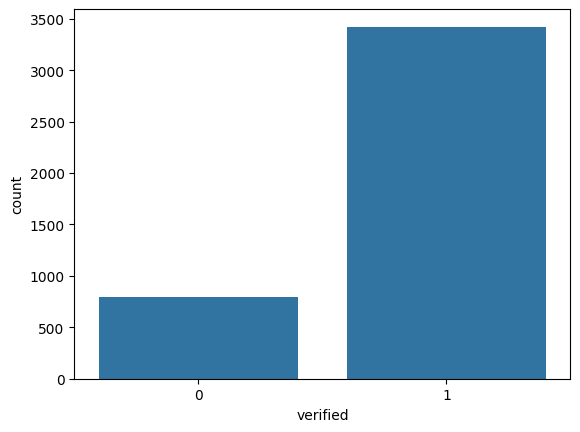

In [94]:
# siuu.countplot(df_final,x =y)


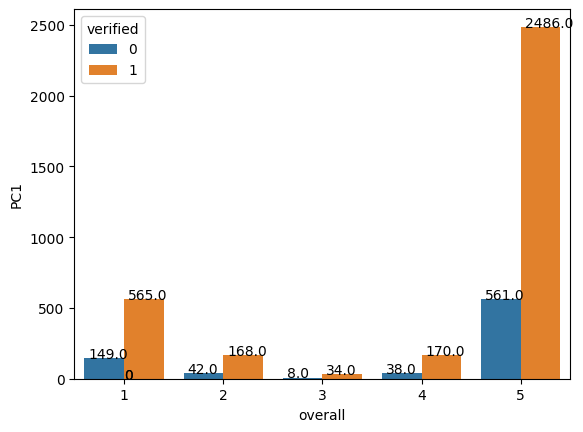

In [41]:


p = siuu.barplot(data = hehe.reset_index(),x = 'overall',y = 'PC1',hue = 'verified')
for b in p.patches:

    p.annotate(b.get_height(),xy=( b.get_x()+ b.get_width()/10,  b.get_height()))


In [42]:
# X = data.drop(['verified','reviewerID_encoded','productID_encoded'],axis =1)
# y = data['verified']

In [43]:
# X_T,X_test,y_T,y_test =     train_test_split(X,y,test_size= 0.19,stratify=y,random_state= 4122004)
# X_train,X_val,y_train,y_val =     train_test_split(X_T,y_T,test_size= 0.11,stratify=y_T,random_state= 4122004)


# LSTM

In [41]:

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

from math import sqrt
import matplotlib.pyplot as plt
# be able to save images on server
import seaborn as siuu
import numpy as np

In [12]:

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('models/best_model.keras', monitor = 'val_accuracy', verbose = 1, save_best_only = True)
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)

In [55]:
def lstm_model(hp):
    model = Sequential()
    unit_lstm = hp.Int('unit_lstm', min_value=20, max_value=100, step=20)
    neuron_dense =  hp.Int('layer_1', min_value=40, max_value=150)

    model.add(LSTM(units = unit_lstm, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(rate = hp.Float('dropout',min_value = 0.1,max_value = 0.4,step = 0.1)))
    model.add(Dense(neuron_dense,activation= 'relu'))
    model.add(Dense(2,activation = 'softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate= 1e-3)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())
    return model




In [22]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline as imbalanced_make_pipeline


In [73]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score,accuracy_score,classification_report,confusion_matrix

In [58]:
sss = StratifiedKFold(shuffle = True,random_state= 4122004)


In [24]:
from keras_tuner import RandomSearch

In [59]:
## tuner
tuner = RandomSearch(
    lstm_model,
    objective='val_accuracy',
    max_trials= 10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='smote_tuning'
)

Reloading Tuner from my_dir\smote_tuning\tuner0.json


In [38]:
y2.shape

(4212,)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y2 = y2.to_numpy()


In [74]:

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
for fold,( train, test) in enumerate(sss.split(X2_new, y2)):

    print(f'\n\n\nFOLD { fold}')
    smote = SMOTE(sampling_strategy='minority',random_state = 4122004)
    X_train_sm, y_train_sm = smote.fit_resample(X2_new[train], y2[train]) 
    
    # SMOTE happens during Cross Validation not before..
    encoder = OneHotEncoder(sparse_output= False)
    encoded_y_train = encoder.fit_transform(y_train_sm.reshape(X_train_sm.shape[0],1))

    encoded_y_train = pd.DataFrame(encoded_y_train)


    
    tuner.search(X_train_sm, encoded_y_train ,
             epochs=50,
             batch_size=40,
             validation_split =0.1,
             
             callbacks=[checkp, reduce]   #check and reduce are below
            )
    
    best_model = tuner.get_best_models(num_models=1)[0]
    best_model.save(f'models/do2/best_model_fold_{fold}.keras')

    prediction = best_model.predict(X2_new[test])
    prediction = np.argmax(prediction, axis=1)


    print(accuracy_score(y2[test], prediction))
    print(precision_score(y2[test], prediction))

    print(recall_score(y2[test], prediction))
    print(f1_score(y2[test], prediction))

    print(roc_auc_score(y2[test], prediction))
    

    print('Accuracy : ' + str(accuracy_score(y2[test], prediction)))
    print(confusion_matrix(y2[test], prediction))
    print(classification_report(y2[test], prediction, target_names = ['Spam','No spam']))


    accuracy_lst.append(accuracy_score(y2[test], prediction))
    precision_lst.append(precision_score(y2[test], prediction))
    recall_lst.append(recall_score(y2[test], prediction))
    f1_lst.append(f1_score(y2[test], prediction))
    auc_lst.append(roc_auc_score(y2[test], prediction))




FOLD 0


c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,527 (189.56 KB)

 Trainable params: 48,527 (189.56 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


None
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
0.9157769869513642
0.9622356495468278
0.9326500732064422
0.9472118959107807
0.8882000366032211
Accuracy : 0.9157769869513642
[[135  25]
 [ 46 637]]
              precision    recall  f1-score   support

        Spam       0.75      0.84      0.79       160
     No spam       0.96      0.93      0.95       683

    accuracy                           0.92       843
   macro avg       0.85      0.89      0.87       843
weighted avg       0.92      0.92      0.92       843




FOLD 1


c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,527 (189.56 KB)

 Trainable params: 48,527 (189.56 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


None
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
0.9584816132858838
0.9924012158054711
0.9560761346998536
0.9739000745712155
0.9624130673499268
Accuracy : 0.9584816132858838
[[155   5]
 [ 30 653]]
              precision    recall  f1-score   support

        Spam       0.84      0.97      0.90       160
     No spam       0.99      0.96      0.97       683

    accuracy                           0.96       843
   macro avg       0.92      0.96      0.94       843
weighted avg       0.96      0.96      0.96       843




FOLD 2


c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,527 (189.56 KB)

 Trainable params: 48,527 (189.56 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


None
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
0.9703087885985748
0.9969788519637462
0.9663250366032211
0.9814126394052045
0.97687321012551
Accuracy : 0.9703087885985748
[[157   2]
 [ 23 660]]
              precision    recall  f1-score   support

        Spam       0.87      0.99      0.93       159
     No spam       1.00      0.97      0.98       683

    accuracy                           0.97       842
   macro avg       0.93      0.98      0.95       842
weighted avg       0.97      0.97      0.97       842




FOLD 3


c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,527 (189.56 KB)

 Trainable params: 48,527 (189.56 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


None
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
0.9631828978622328
0.9880239520958084
0.9663250366032211
0.9770540340488527
0.9580052855972081
Accuracy : 0.9631828978622328
[[151   8]
 [ 23 660]]
              precision    recall  f1-score   support

        Spam       0.87      0.95      0.91       159
     No spam       0.99      0.97      0.98       683

    accuracy                           0.96       842
   macro avg       0.93      0.96      0.94       842
weighted avg       0.97      0.96      0.96       842




FOLD 4


c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           152 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,527 (189.56 KB)

 Trainable params: 48,527 (189.56 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Admin\miniconda3\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


None
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
0.9513064133016627
0.9893129770992366
0.9501466275659824
0.9693343305908751
0.9531983137829912
Accuracy : 0.9513064133016627
[[153   7]
 [ 34 648]]
              precision    recall  f1-score   support

        Spam       0.82      0.96      0.88       160
     No spam       0.99      0.95      0.97       682

    accuracy                           0.95       842
   macro avg       0.90      0.95      0.93       842
weighted avg       0.96      0.95      0.95       842



### old

In [167]:

result = model.fit(X_train, y_train, batch_size = 100, validation_data = (X_val, y_val),class_weight= {0:1,1:1},epochs = 100, callbacks = [checkp, reduce])


Epoch 1/100
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4919 - loss: 0.7734
Epoch 1: val_accuracy did not improve from 0.92021
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.4939 - loss: 0.7668 - val_accuracy: 0.5594 - val_loss: 0.6724 - learning_rate: 0.0010
Epoch 2/100
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5916 - loss: 0.6546
Epoch 2: val_accuracy did not improve from 0.92021
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5900 - loss: 0.6557 - val_accuracy: 0.7133 - val_loss: 0.6300 - learning_rate: 0.0010
Epoch 3/100
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6918 - loss: 0.6210
Epoch 3: val_accuracy did not improve from 0.92021
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6919 - loss: 0.6188 - val_accuracy: 0.7692 - val_loss: 0.5366 - learning_rate: 0.0010
Epoch 4/100
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7232 - loss: 0.5612
Epoch 4: val_accuracy did not improve from 0.92021
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42

In [87]:
result

Text(0.5, 1.0, 'Model accuracy by Epoch')

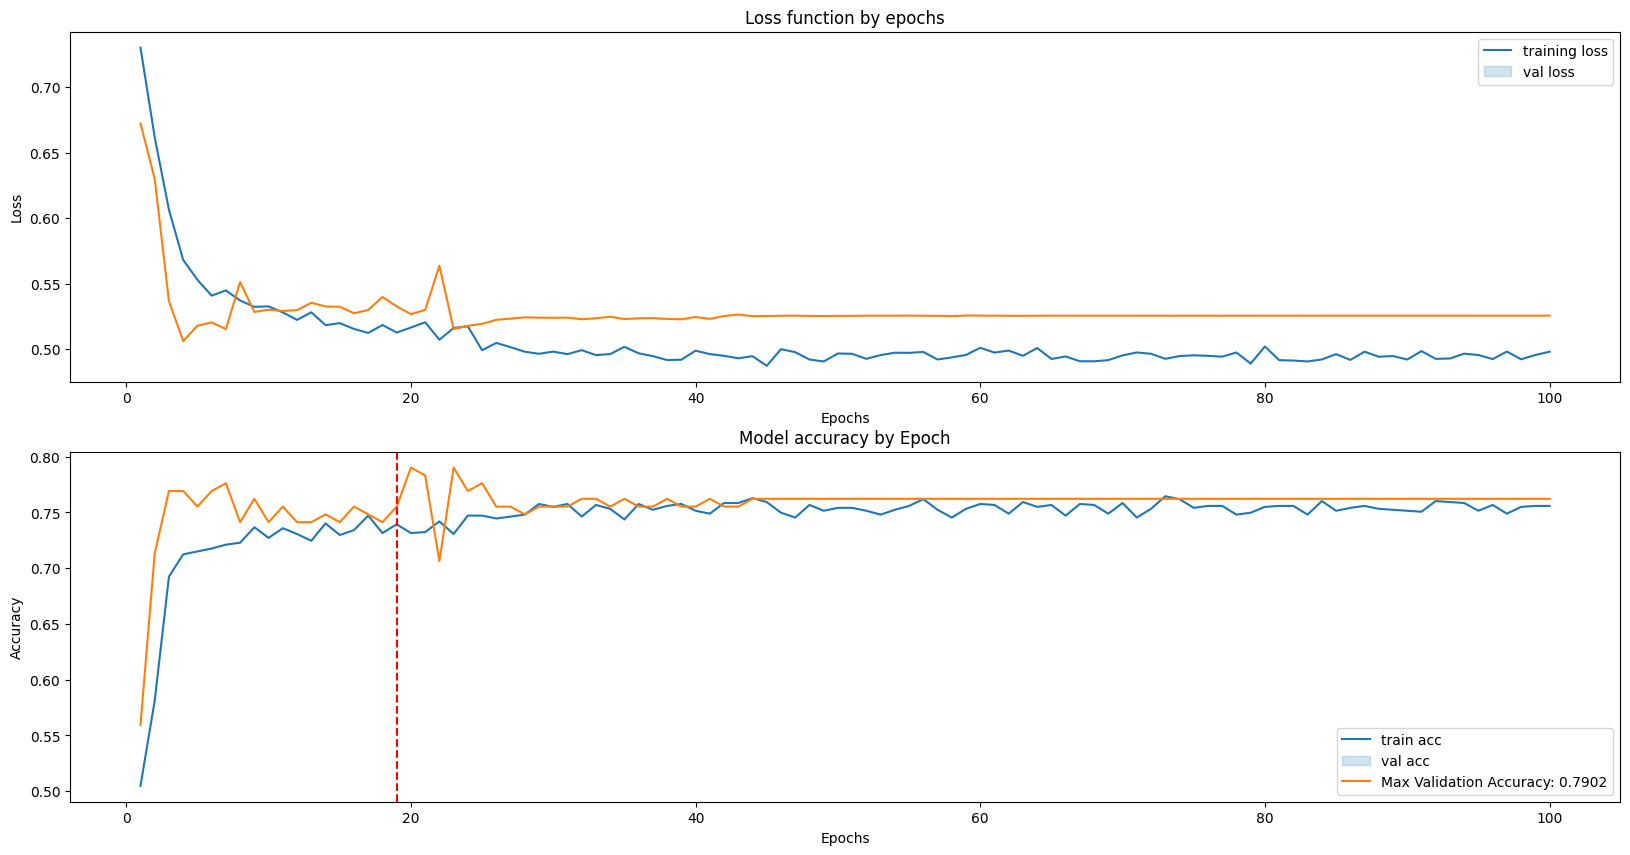

In [168]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
siuu.lineplot(x=range(1, len(result.history['loss']) + 1), y=result.history['loss'])
siuu.lineplot(x=range(1, len(result.history['val_loss']) + 1), y=result.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training loss', 'val loss'])
plt.title('Loss function by epochs')

plt.subplot(2, 1, 2)
siuu.lineplot(x=range(1, len(result.history['accuracy']) + 1), y=result.history['accuracy'])
siuu.lineplot(x=range(1, len(result.history['val_accuracy']) + 1), y=result.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
max_val_acc = max(result.history['val_accuracy'])
plt.axvline(x=result.history['val_accuracy'].index(max_val_acc), color='red', linestyle='--')
plt.legend(['train acc', 'val acc', f'Max Validation Accuracy: {max_val_acc:.4f}'])
plt.title('Model accuracy by Epoch')

In [138]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [89]:
from keras.utils import plot_model
model = load_model('models/best_model.keras')
plot_model(model, to_file='model_visualization.png', show_shapes=True, dpi=50)


AttributeError: module 'pydot' has no attribute 'InvocationException'

In [169]:
pred = model.predict(X_test)
pred

pred = np.argmax(pred, axis = 1)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [163]:
y_test_ori = encoder.inverse_transform(y_test)
y_test_ori = y_test_ori.reshape(y_test_ori.shape[0])

In [170]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Accuracy : ' + str(accuracy_score(y_test_ori, pred)))
print(confusion_matrix(y_test_ori, pred))
print(classification_report(y_test_ori, pred, target_names = ['Spam','No spam']))

Accuracy : 0.756578947368421
[[ 96  56]
 [ 18 134]]
              precision    recall  f1-score   support

        Spam       0.84      0.63      0.72       152
     No spam       0.71      0.88      0.78       152

    accuracy                           0.76       304
   macro avg       0.77      0.76      0.75       304
weighted avg       0.77      0.76      0.75       304




*** imbalanced 
Accuracy : 0.898876404494382
[[ 90  62]
 [ 19 630]]
              precision    recall  f1-score   support

        Spam       0.83      0.59      0.69       152
     No spam       0.91      0.97      0.94       649

    accuracy                           0.90       801
   macro avg       0.87      0.78      0.81       801
weighted avg       0.89      0.90      0.89       801

In [109]:
pred

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,

In [101]:
pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## LSTM with smote

In [175]:
from scikeras.wrappers import KerasClassifier

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
checkp = ModelCheckpoint('models/best_model.keras', monitor = 'val_accuracy', verbose = 1, save_best_only = True)
reduce = ReduceLROnPlateau(monitor = 'val_loss', patience = 20, verbose = 1)    

def model_lstm():
    model = Sequential()

    model.add(LSTM(units = 40, input_shape = (X_train.shape[1], 1)))
    model.add(Dropout(0.1))
    model.add(Dense(100,activation= 'relu'))
    model.add(Dense(2,activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    print(model.summary())
    return model

KerasClassifier(model = model_lstm())

